# Intent Classification

## Data Requirements

De essentie van Data Requierments is dat je moet begrijpen dat een stakeholder deze data opslaat vr een specifieke reden of doel.

Dit onderdeel heb ik uitgebreid behandeld in het word document wat bij deze challenge zit.

Bestand: .. op pagina ..

## Data Collection

Data collection is het proces van het verzamelen van informatie uit een vastgesteld systeem. Het doel van data collection is:
het verzamelen van kwaliteitsbewijs dat analyse mogelijk maakt om tot overtuigende en geloofwaardige antwoorden op de gestelde vragen te komen.

Dit onderdeel is terug te vinden in het word document wat bij deze challenge zit.

Bestand .. op pagina ..

## 1. Data Understanding
In de EDA van dit project, begin ik met het toevoegen van de libraries. Vervolgens lees ik de csv file, die ik verkregen, heb uit en geef ik deze file een variabel.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#File uitlezen
df_keukens = pd.read_csv("data/intent-test-keukens.csv")

Ik bekijk eerst wat er precies in de dataset staat door de eerste vijf en de laatste vijf rijen te bekijken.

In [3]:
df_keukens.head()

,Keyword,Zoekvolume,CPC (average),Segment,Subsegment,Intentie,INFO,COM,TRANS,BQ1,BQ2,BQ3,BQ4,BQ5,Getstat
0,keuken,60500,1.06,keuken koopproces,Keuken kopen,TRANS,False,False,False,keuken koopproces,TRANS,keuken koopproces | Keuken kopen,keuken koopproces - TRANS,keuken koopproces | Keuken kopen - TRANS,"keuken koopproces, keuken koopproces | Keuken ..."
1,koelkast,40500,0.49,apparatuur,Koelkast,TRANS,False,False,False,apparatuur,TRANS,apparatuur | Koelkast,apparatuur - TRANS,apparatuur | Koelkast - TRANS,"apparatuur, apparatuur | Koelkast, apparatuur ..."
2,inductie kookplaat,40500,0.45,apparatuur,Kookplaat inductie,TRANS,False,False,False,apparatuur,TRANS,apparatuur | Kookplaat inductie,apparatuur - TRANS,apparatuur | Kookplaat inductie - TRANS,"apparatuur, apparatuur | Kookplaat inductie, a..."
3,afzuigkap,27100,0.49,apparatuur,Afzuigkap,TRANS,False,False,False,apparatuur,TRANS,apparatuur | Afzuigkap,apparatuur - TRANS,apparatuur | Afzuigkap - TRANS,"apparatuur, apparatuur | Afzuigkap, apparatuur..."
4,vaatwasser,27100,0.41,apparatuur,Vaatwasser,TRANS,False,False,False,apparatuur,TRANS,apparatuur | Vaatwasser,apparatuur - TRANS,apparatuur | Vaatwasser - TRANS,"apparatuur, apparatuur | Vaatwasser, apparatuu..."


In [4]:
df_keukens.tail()

,Keyword,Zoekvolume,CPC (average),Segment,Subsegment,Intentie,INFO,COM,TRANS,BQ1,BQ2,BQ3,BQ4,BQ5,Getstat
38659,groothandel keuken accessoires,10,0.0,toebehoren & accessoires,accessoires,TRANS,False,False,False,toebehoren & accessoires,TRANS,toebehoren & accessoires | accessoires,toebehoren & accessoires - TRANS,toebehoren & accessoires | accessoires - TRANS,"toebehoren & accessoires, toebehoren & accesso..."
38660,keuken accessoires groothandel,10,0.0,toebehoren & accessoires,accessoires,TRANS,False,False,False,toebehoren & accessoires,TRANS,toebehoren & accessoires | accessoires,toebehoren & accessoires - TRANS,toebehoren & accessoires | accessoires - TRANS,"toebehoren & accessoires, toebehoren & accesso..."
38661,roze keuken accessoires,10,0.0,toebehoren & accessoires,accessoires,TRANS,False,False,False,toebehoren & accessoires,TRANS,toebehoren & accessoires | accessoires,toebehoren & accessoires - TRANS,toebehoren & accessoires | accessoires - TRANS,"toebehoren & accessoires, toebehoren & accesso..."
38662,zwart wit keuken accessoires,10,0.0,toebehoren & accessoires,accessoires,TRANS,False,False,False,toebehoren & accessoires,TRANS,toebehoren & accessoires | accessoires,toebehoren & accessoires - TRANS,toebehoren & accessoires | accessoires - TRANS,"toebehoren & accessoires, toebehoren & accesso..."
38663,greepjes keuken vervangen,10,0.0,toebehoren & accessoires,Handgrepen,TRANS,False,False,False,toebehoren & accessoires,TRANS,toebehoren & accessoires | Handgrepen,toebehoren & accessoires - TRANS,toebehoren & accessoires | Handgrepen - TRANS,"toebehoren & accessoires, toebehoren & accesso..."


Vervolgens ga ik de shape van de dataset bekijken. Ik kijk dus naar hoe groot de dataset precies is.

In [5]:
df_keukens.shape

(38664, 15)

Deze dataset is verdeeld in 15 kolommen. Hiervan heb ik uiteindelijk enkel de volgende kolommen nodig:
- Keyword
- Intentie

Verder heeft de dataset 38664 rijen aan data.<br>

Ik begin nu met de dataset terug te schalen naar deze 2 kolommen

In [8]:
df_keukens = df_keukens[['Keyword', 'Intentie']].copy()
df_keukens

,Keyword,Intentie
0,keuken,TRANS
1,koelkast,TRANS
2,inductie kookplaat,TRANS
3,afzuigkap,TRANS
4,vaatwasser,TRANS
...,...,...
38659,groothandel keuken accessoires,TRANS
38660,keuken accessoires groothandel,TRANS
38661,roze keuken accessoires,TRANS
38662,zwart wit keuken accessoires,TRANS


Nu ga ik een klein overzicht maken van de dataset, dit doe ik meet de describe() functie. De describe functie geeft een snel en goed ovoerzicht van enkele belangrijke punten. Zo zie je hoe veel verschillende unieke waardes iedere kolom heeft en welke waarde het meeste voorkomt.

In [9]:
df_keukens.describe()

,Keyword,Intentie
count,38664,38664
unique,38325,4
top,hoogte afzuigkap kookplaat,TRANS
freq,2,28399


Uit de twee kolommen die deze dataset heeft, zie je dat de eerste kolom allemaal unieke waardes bevat. Hierdoor is de 'top' rij niet relevant. 

De 2e kolom genaamd 'Intentie" heeft 4 verschillende waardes. Wat in mijn verslag al uitgezocht is, is dat deze kolom bestaat uit de 4 volgende waardes, namelijk:
- Informatief (INFO)
- Navigatief (LOCAL)
- Transactioneel (TRANS)
- Commercieel (COM)

Je ziet dat Trans het meest voorkomend is.

Als laatst bekijk ik wat voor types er in de dataset staan (int of string). Dit doe ik met de .info methode.

In [10]:
df_keukens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38664 entries, 0 to 38663
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Keyword   38664 non-null  object
 1   Intentie  38664 non-null  object
dtypes: object(2)
memory usage: 604.2+ KB


Je ziet dat alle kolommen objecten zijn, wat betekent dat het meerdere Dtypes kan bevatten.


## 2. Cleaning the data

In dit onderdeel gan ik kijken of er ergens waardes missen, en/of er rijen/kolommen uit de dataset gehaald kunnen worden.

In [11]:
#Checken of er missende data in de dataset te vinden is
df_keukens.isnull().sum()

Keyword     0
Intentie    0
dtype: int64

Deze dataset bevat geen missende data.

## 3. Data Visualization

In dit onderdeel ga ik de data d.m.v. plots visualizeren. Dit doe ik om een duidelijker beeld te krijgen van hoe de data er precies uit ziet.

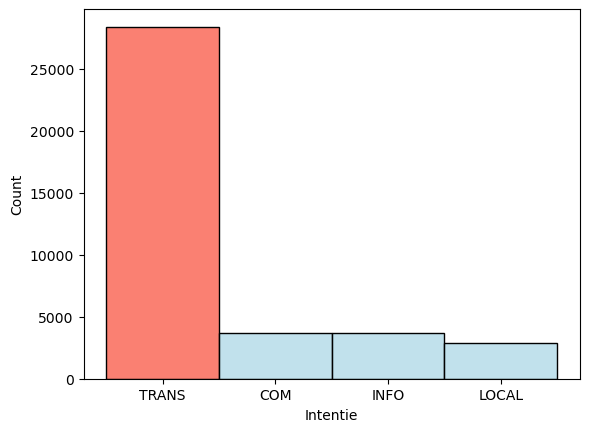

In [14]:
ax = sns.histplot(df_keukens, x='Intentie', color='lightblue')
ax.patches[0].set_facecolor('salmon')
plt.show()

Zoals we eerder al hadden gezien bij de describe() functie, weten we dat TRANS de categorie is die het meest in deze dataset voorkomt.

In [15]:
df_keukens

,Keyword,Intentie
0,keuken,TRANS
1,koelkast,TRANS
2,inductie kookplaat,TRANS
3,afzuigkap,TRANS
4,vaatwasser,TRANS
...,...,...
38659,groothandel keuken accessoires,TRANS
38660,keuken accessoires groothandel,TRANS
38661,roze keuken accessoires,TRANS
38662,zwart wit keuken accessoires,TRANS


In [17]:
#dataset omnzetten in csv file
df_keukens.to_csv('intent-keuken.csv', index=False)

## Conclusie

In dit script heb ik bekeken wat er precies in de dataset staat en of er waardes in staan die weggelaten kunnen worden. Gezien het een kleine dataset is, valt er aan visualisatie niet zo veel weer te geven.

Deze dataset ga ik nu verder gebruiken voor het model.